Moduuls and imports

In [105]:
!pip install ucimlrepo
!pip install ucimlrepo
from sklearn import model_selection,tree
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
from re import X
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score

# tesk 1
- loading data sets
- no dubplicate in any of the dataSets. only cancer dataSet has missing data
- there is no garantee for highers mean to have association with more coorolation of the feature with class label but it's a relaible inferance based on MSE


In [ ]:
#Adult positive
#2 positive

np.random.seed(1234)
national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset = fetch_ucirepo(id=887)
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)
#cancer dataSet
cancer_X = breast_cancer_wisconsin_original.data.features
cancer_Y = breast_cancer_wisconsin_original.data.targets
#age froup dataset
health_X = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.features
health_Y = national_health_and_nutrition_health_survey_2013_2014_nhanes_age_prediction_subset.data.targets
#cleaning(don't forget to cp[y your dublicate from vs Code)
table_of_missing= cancer_X.isna()
rows_with_true_values = table_of_missing[table_of_missing.any(axis=1)]
cancer_df = (cancer_X.join(cancer_Y))
table_of_missing_cancer=cancer_df.isna()
cancer_df_cleaned = cancer_df.dropna()
health_df_cleaned = health_X.join(health_Y)
table_of_missing_health=health_df_cleaned.isna()
cancer_train , cancer_test = cancer_df_cleaned[:547] , cancer_df_cleaned[547:]
health_train , health_test = health_df_cleaned[:1823] , health_df_cleaned[1823:]
#Data processing for knn
x_train_cr_knn = cancer_train.drop("Class",axis=1)
y_train_cr_knn = cancer_train[["Class"]]
x_test_cr_knn = cancer_test.drop("Class",axis=1)
y_test_cr_knn = cancer_test[["Class"]]
x_train_hlth_knn = health_train.drop("age_group",axis=1)
y_train_hlth_knn = health_train[["age_group"]]
x_test_hlth_knn = health_test.drop("age_group",axis=1)
y_test_hlth_knn = health_test[["age_group"]]
x_train_cr_knn = np.array(x_train_cr_knn)
y_train_cr_knn.loc[:, 'Class'] = y_train_cr_knn['Class'].map({2: 0, 4: 1})
y_train_cr_knn= np.array(y_train_cr_knn).flatten()
x_test_cr_knn = np.array(x_test_cr_knn)
y_test_cr_knn.loc[:, 'Class'] = y_test_cr_knn['Class'].map({2: 0, 4: 1})
y_test_cr_knn = np.array(y_test_cr_knn).flatten()
x_train_hlth_knn = np.array(x_train_hlth_knn)
y_train_hlth_knn.loc[:, 'age_group'] = y_train_hlth_knn['age_group'].map({"Adult": 0, "Senior": 1})
y_train_hlth_knn= np.array(y_train_hlth_knn).flatten()
x_test_hlth_knn = np.array(x_test_hlth_knn)
y_test_hlth_knn.loc[:, 'age_group'] = y_test_hlth_knn['age_group'].map({"Adult": 0, "Senior": 1})
y_test_hlth_knn = np.array(y_test_hlth_knn).flatten()
#data processing for DT
x_train_cr_dt = cancer_train.drop("Class",axis=1)
y_train_cr_dt = cancer_train[["Class"]]
x_test_cr_dt = cancer_test.drop("Class",axis=1)
y_test_cr_dt = cancer_test[["Class"]]
x_train_hlth_dt = health_train.drop("age_group",axis=1)
y_train_hlth_dt = health_train[["age_group"]]
x_test_hlth_dt = health_test.drop("age_group",axis=1)
y_test_hlth_dt = health_test[["age_group"]]
x_train_cr_dt =np.array(x_train_cr_dt[["Uniformity_of_cell_shape"]].join(x_train_cr_dt[["Bare_nuclei"]]).join(x_train_cr_dt[["Uniformity_of_cell_size"]]))
y_train_cr_dt.loc[:, 'Class'] = y_train_cr_dt['Class'].map({2: 0, 4: 1})
y_train_cr_dt= np.array(y_train_cr_dt).flatten()
x_test_cr_dt = np.array(x_test_cr_dt[["Uniformity_of_cell_shape"]].join(x_test_cr_dt[["Bare_nuclei"]]).join(x_test_cr_dt[["Uniformity_of_cell_size"]]))
y_test_cr_dt.loc[:, 'Class'] = y_test_cr_dt['Class'].map({2: 0, 4: 1})
y_test_cr_dt = np.array(y_test_cr_dt).flatten()
x_train_hlth_dt = np.array(x_train_hlth_dt[["LBXGLU"]].join(x_train_hlth_dt[["LBXGLT"]]))
y_train_hlth_dt.loc[:, 'age_group'] = y_train_hlth_dt['age_group'].map({"Adult": 0, "Senior": 1})
y_train_hlth_dt= np.array(y_train_hlth_dt).flatten()
x_test_hlth_dt = np.array(x_test_hlth_dt[["LBXGLU"]].join(x_test_hlth_dt[["LBXGLT"]]))
y_test_hlth_dt.loc[:, 'age_group'] = y_test_hlth_dt['age_group'].map({"Adult": 0, "Senior": 1})
y_test_hlth_dt = np.array(y_test_hlth_dt).flatten()


#compute basic statistics for cancer
basic_stat_cr = cancer_df_cleaned.describe()
positive_cancer= cancer_df_cleaned[cancer_df_cleaned["Class"]==2]
positive_cancer_X = positive_cancer.drop("Class",axis=1)
positive_cancer_Y = positive_cancer[["Class"]]
negative_cancer = cancer_df_cleaned[cancer_df_cleaned["Class"]==4]
negative_cancer_X = negative_cancer.drop("Class",axis=1)
negative_cancer_Y = negative_cancer[["Class"]]
negative_mean_cr = negative_cancer_X.describe().loc["mean"]
positive_mean_cr = positive_cancer_X.describe().loc["mean"]
mean_df_cr = pd.DataFrame({'negative': negative_mean_cr, 'positive': positive_mean_cr})
mean_sqr_serie_cr={}
for feature, mean in mean_df_cr.iterrows():
  mean_sqr_serie_cr[feature]= (mean["negative"]- mean["positive"])**2

mean_df_cr["mean_sqr_diff"] = mean_sqr_serie_cr
mean_df_cr = mean_df_cr.sort_values(by="mean_sqr_diff", ascending=False)
#******************* TO FIND BASIC STATISTIC ANALYSIS FOR CANCER UNCOMMENT THIS SECTION *******************
print(mean_df_cr)
print(basic_stat_cr)
#******************* TO FIND BASIC STATISTIC ANALYSIS FPR CANCER UNCOMMENT THIS SECTION *******************

#health basi statistics
basic_stat_hlth = health_df_cleaned.describe()
positive_health = health_df_cleaned[health_df_cleaned["age_group"] == "Senior"]
positive_health_X = positive_health.drop("age_group", axis = 1)
positive_health_Y = positive_health[["age_group"]]
negative_health =health_df_cleaned[health_df_cleaned["age_group"] != "Senior"]
negative_health_X = negative_health.drop("age_group", axis = 1)
negative_health_Y = negative_health[["age_group"]]
negative_mean_hlth= negative_health_X.describe().loc["mean"]
positive_mean_hlth = positive_health_X.describe().loc["mean"]
mean_df_hlth = pd.DataFrame({'negative': negative_mean_hlth, 'positive': positive_mean_hlth})
mean_sqr_serie_hlth={}
for feature, mean in mean_df_hlth.iterrows():
  mean_sqr_serie_hlth[feature]= (mean["negative"]- mean["positive"])**2
mean_df_hlth["mean_sqr_diff"] = mean_sqr_serie_hlth
mean_df_hlth = mean_df_hlth.sort_values(by="mean_sqr_diff", ascending=False)
#******************* TO FIND BASIC STATISTIC ANALYSIS FOR HEALTH UNCOMMENT THIS SECTION *******************
print(mean_df_hlth)
print(basic_stat_hlth)
#******************* TO FIND BASIC STATISTIC ANALYSIS FOR HEALTH UNCOMMENT THIS SECTION *******************


<ipython-input-106-e4a9a80a90e2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_cr_knn.loc[:, 'Class'] = y_train_cr_knn['Class'].map({2: 0, 4: 1})
<ipython-input-106-e4a9a80a90e2>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_cr_knn.loc[:, 'Class'] = y_test_cr_knn['Class'].map({2: 0, 4: 1})
<ipython-input-106-e4a9a80a90e2>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

#Task 2 - knn
- design decision. for roboustness add the evaluate_acc function to to the KNN class rather than designing it globaly

In [107]:
#distance functions
#design decision. for roboustness add the evaluate_acc function to to the KNN class rather than designing it globaly
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
#knn implementation
class KNN:
    def __init__(self, K=10, distance = euclidean):
        self.distance = distance
        self.K = K
        return
    def fit(self, x, y, label_count):
        self.x = x
        self.y = y
        self.label_count = label_count
        return self

    def predict(self, x_test):
        num_test = x_test.shape[0]
        distances = self.distance(self.x[None,:,:], x_test[:,None,:])#(455, 1823) for each of thest values we have the dist to all the train values
        knns = np.zeros((num_test, self.K), dtype=int)
        y_prob = np.zeros((num_test, self.label_count))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]#indexing the k closest ones(not the actual values are saved just the index)
            y_prob[i,:] = np.bincount(self.y[knns[i,:]].flatten(), minlength=self.label_count) #counts the number of instances of each class in the K-closest training samples
        y_prob /= self.K
        y_pred = np.argmax(y_prob, axis=-1)
        return y_pred , y_prob
    def evaluate_acc(self, y_pred, y_test):
        accuracy = np.sum(y_pred == y_test.flatten())/y_test.shape[0]
        return  accuracy
#******************* A GUID ON HOW TO USE THIS MACHINE LEARNING ALGORITHM *******************
# knn_cr_knn= KNN(1,manhattan)
# knn_cr_knn.fit(x_train_cr_knn, y_train_cr_knn.astype('int64'),2)
# y_pred_test_cr_knn , y_prob_test_cr_knn = knn_cr_knn.predict(x_test_cr_knn)
# y_prob_test_cr_knn = y_prob_test_cr_knn[:,1]
# acc_test_cr_knn = knn_cr_knn.evaluate_acc(y_pred_test_cr_knn,y_test_cr_knn)
# roc_auc_test_cr_knn = roc_auc_score(y_test_cr_knn, y_prob_test_cr_knn)
# print(acc_test_cr_knn)
# print(roc_auc_test_cr_knn)
#******************* A GUID ON HOW TO USE THIS MACHINE LEARNING ALGORITHM *******************

# TASK 2 - DT

In [108]:
#Cost Functions
#SIDE NOTE: astype('int64') is used since changing the dataFrame value does not change the typing of it so it has to be done manually to avoid type inference errors
def cost_misclassification(labels):
    counts = np.bincount(labels.flatten().astype('int64'))
    class_probs = counts / np.sum(counts)
    return 1 - np.max(class_probs)

def cost_entropy(labels):
    class_probs = np.bincount(labels.flatten().astype('int64'))/ len(labels)
    class_probs = class_probs[class_probs > 0]
    return -np.sum(class_probs * np.log2(class_probs))

def cost_gini_index(labels):
    class_probs = np.bincount(labels.flatten().astype('int64')) / len(labels)
    return 1 - np.sum(np.square(class_probs))

#Node Object
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices

        self.left = None
        self.right = None
        self.split_feature = None
        self.split_value = None
        if parent:
            self.depth = parent.depth + 1

            self.num_classes = parent.num_classes
            self.data = parent.data
            self.labels = parent.labels
            class_prob = np.bincount(self.labels[data_indices].flatten().astype('int64'), minlength=self.num_classes)
            self.class_prob = class_prob / np.sum(class_prob)
#Decision
class DT:
    def __init__(self, num_classes=2, max_depth=1, cost_fn=cost_gini_index, min_leaf_instances=1):
        self.max_depth = max_depth
        self.root = None
        self.cost_fn = cost_fn
        self.num_classes = num_classes
        self.min_leaf_instances = min_leaf_instances

    def greedy_test(node, cost_fn):
      best_cost = np.inf
      best_feature, best_value = None, None
      num_instances, num_features = node.data.shape
      data_sorted = np.sort(node.data[node.data_indices],axis=0)
      test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
      for f in range(num_features):
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
              left_indices = node.data_indices[data_f <= test]
              right_indices = node.data_indices[data_f > test]
              if len(left_indices) == 0 or len(right_indices) == 0:
                  return best_cost, best_feature, best_value
              left_cost = cost_fn(node.labels[left_indices])
              right_cost = cost_fn(node.labels[right_indices])
              num_left, num_right = left_indices.shape[0], right_indices.shape[0]
              cost = (num_left * left_cost + num_right * right_cost)/num_instances
              if cost < best_cost:
                  best_cost = cost
                  best_feature = f
                  best_value = test
      return best_cost, best_feature, best_value
    def _fit_tree(self, node):
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        cost, split_feature, split_value = DT.greedy_test(node, self.cost_fn)
        if np.isinf(cost):
            return
        test = node.data[node.data_indices,split_feature] <= split_value
        node.split_feature = split_feature
        node.split_value = split_value
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        self._fit_tree(left)
        self._fit_tree(right)
        node.left = left
        node.right = right
    def fit(self, data, labels):
      self.data = data
      self.labels = labels
      if self.num_classes is None:
          self.num_classes = 2
      self.root = Node(np.arange(data.shape[0]), None)
      self.root.data = data
      self.root.labels = labels
      self.root.num_classes = self.num_classes
      self.root.depth = 0
      self._fit_tree(self.root)
      return self
    def predict(self, data_test):
        class_probs = np.zeros((data_test.shape[0], self.num_classes))
        for n, x in enumerate(data_test):
            node = self.root
            while node.left:
                if x[node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            class_probs[n,:] = node.class_prob
            y_pred = np.argmax(class_probs, axis=-1)
        return  y_pred, class_probs
    def evaluate_acc(self, y_pred, y_test):
        y_test = np.array(y_test)
        accuracy = np.sum(y_pred == y_test.flatten())/y_test.shape[0]
        return  accuracy

#******************* A GUID ON HOW TO USE THIS MACHINE LEARNING ALGORITHM *******************
# dt_cr_dt = DT(2,1,cost_misclassification)
# dt_cr_dt.fit(x_train_cr_dt,y_train_cr_dt.astype('int64'))
# y_pred_test_cr_dt , y_prob_test_cr_dt = dt_cr_dt.predict(x_test_cr_dt)
# acc_test_cr_dt = dt_cr_dt.evaluate_acc(y_pred_test_cr_dt,y_test_cr_dt)
# y_prob_test_cr_dt = y_prob_test_cr_dt[:,1]
# roc_auc_test_cr_dt = roc_auc_score(y_test_cr_dt.astype('int64'), y_prob_test_cr_dt)
# print(acc_test_cr_dt)
# print(roc_auc_test_cr_dt)
#******************* A GUID ON HOW TO USE THIS MACHINE LEARNING ALGORITHM *******************

# Task 3 - Running experiments
- AUC comparison for KNN (for this example we onlt use euclidean distance function since the distance comparison is done in another section)
-PLEASE READ: THE VALUES FOR DT IS REPETATIVE BUT YOU'LL GET THE SAME RESULT USING SKLEARN


0.6405186779613943
0.70156922649632


<ipython-input-109-c304b930361c>:458: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr_knn, tpr_knn, "b-", lw=2,color="black" ,label="AUROC_knn = %0.2f"%roc_auc_knn)
<ipython-input-109-c304b930361c>:531: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr_knn, tpr_knn, "b-", lw=2,color="black" ,label="AUROC_knn = %0.2f"%roc_auc_knn)


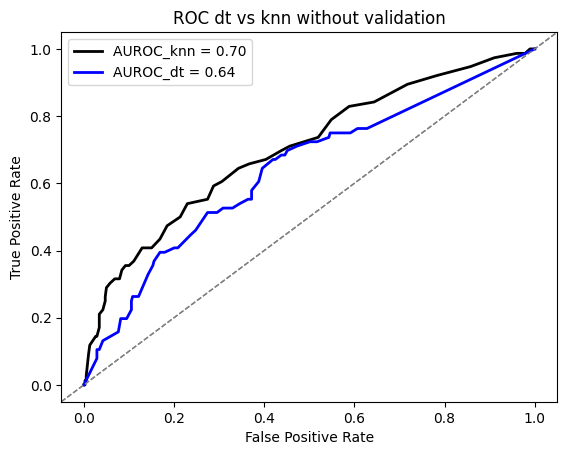

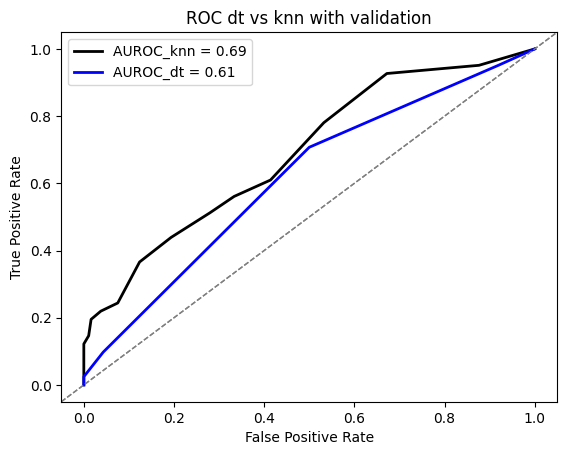

In [109]:
#AUC comparison for KNN (for this example we onlt use euclidean distance function since the distance comparison is done in another section) and gini index for dt
#READ ME READ ME READ ME READ ME: THE VALUES FOR DT IS REPETATIVE BUT YOU'LL GET THE SAME RESULT USING SKLEARN
cancer_performance= {'k': [], 'acc_knn_test': [],'acc_dt_test': [], 'auc_knn_test': [],'auc_dt_test': []}
health_performance= {'k': [], 'acc_knn_test': [],'acc_dt_test': [],  'auc_knn_test': [],'auc_dt_test': []}

K_or_d=[1,2,3,5,10,15,20,30,40,50]
# K_or_d=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

# for k_or_d in K_or_d:
#   cancer_performance["k"].append(k_or_d)
#   #update the value for knn algorithm
#   knn_cr_knn= KNN(k_or_d)
#   knn_cr_knn.fit(x_train_cr_knn, y_train_cr_knn.astype('int64'),2)
#   y_pred_test_cr_knn , y_prob_test_cr_knn = knn_cr_knn.predict(x_test_cr_knn)
#   y_prob_test_cr_knn = y_prob_test_cr_knn[:,1]
#   acc_test_cr_knn = knn_cr_knn.evaluate_acc(y_pred_test_cr_knn,y_test_cr_knn)
#   auc_test_cr_knn = roc_auc_score(y_test_cr_knn, y_prob_test_cr_knn)
#   cancer_performance["acc_knn_test"].append(acc_test_cr_knn)
#   cancer_performance["auc_knn_test"].append(auc_test_cr_dt)
#   #update the value for dt algorithm
#   dt_cr_dt = DT(2,k_or_d)
#   dt_cr_dt.fit(x_train_cr_dt,y_train_cr_dt.astype('int64'))
#   y_pred_test_cr_dt , y_prob_test_cr_dt = dt_cr_dt.predict(x_test_cr_dt)
#   y_prob_test_cr_dt = y_prob_test_cr_dt[:,1]
#   acc_test_cr_dt = dt_cr_dt.evaluate_acc(y_pred_test_cr_dt,y_test_cr_dt)
#   auc_test_cr_dt = roc_auc_score(y_test_cr_dt, y_prob_test_cr_dt)
#   cancer_performance["acc_dt_test"].append(acc_test_cr_dt)
#   cancer_performance["auc_dt_test"].append(auc_test_cr_dt)
#   #health
#   health_performance["k"].append(k_or_d)
#   #update the value for knn algorithm
#   knn_hlth_knn= KNN(k_or_d)
#   knn_hlth_knn.fit(x_train_hlth_knn, y_train_hlth_knn.astype('int64'),2)
#   y_pred_test_hlth_knn , y_prob_test_hlth_knn = knn_hlth_knn.predict(x_test_hlth_knn)
#   y_prob_test_hlth_knn = y_prob_test_hlth_knn[:,1]
#   acc_test_hlth_knn = knn_hlth_knn.evaluate_acc(y_pred_test_hlth_knn,y_test_hlth_knn)
#   auc_test_hlth_knn = roc_auc_score(y_test_hlth_knn, y_prob_test_hlth_knn)
#   health_performance["acc_knn_test"].append(acc_test_hlth_knn)
#   health_performance["auc_knn_test"].append(auc_test_hlth_knn)
#   # update the value for dt algorithm
#   dt_hlth_dt = DT(2,k_or_d)
#   dt_hlth_dt.fit(x_train_hlth_dt,y_train_hlth_dt.astype('int64'))
#   y_pred_test_hlth_dt , y_prob_test_hlth_dt = dt_hlth_dt.predict(x_test_hlth_dt)
#   acc_test_hlth_dt = dt_hlth_dt.evaluate_acc(y_pred_test_hlth_dt,y_test_hlth_dt)
#   y_prob_test_hlth_dt = y_prob_test_hlth_dt[:,1]
#   auc_test_hlth_dt = roc_auc_score(y_test_hlth_dt, y_prob_test_hlth_dt)
#   health_performance["acc_dt_test"].append(acc_test_hlth_dt)
#   health_performance["auc_dt_test"].append(auc_test_hlth_dt)


#******************* knn_vs_dt acc cancer GRAPH *******************
# plt.figure()
# plt.plot(cancer_performance["k"], cancer_performance["acc_knn_test"], marker='o', color='blue', label='knn acc')
# plt.plot(cancer_performance["k"], cancer_performance["acc_dt_test"], marker='o', color='black', label='dt acc')
# plt.xlabel("k or h")
# plt.ylabel("acc")
# plt.title('knn vs DT(Acc) for Cancer')
# plt.legend(loc='best')
# plt.savefig('knn_vs_dt_acc_cr.png',dpi=300,bbox_inches='tight')
#*******************knn_vs_dt acc cancer GRAPH*******************


#******************* knn_vs_dt auc cancer GRAPH *******************
# plt.figure()
# plt.plot(cancer_performance["k"], cancer_performance["auc_knn_test"], marker='o', color='blue', label='knn auc')
# plt.plot(cancer_performance["k"], cancer_performance["auc_dt_test"], marker='o', color='black', label='dt auc')
# plt.xlabel("k or h")
# plt.ylabel("auc")
# plt.title('knn vs DT(auc) for Cancer')
# plt.legend(loc='best')
# plt.savefig('knn_vs_dt_auc_cr.png',dpi=300,bbox_inches='tight')
#*******************knn_vs_dt auc cancer GRAPH*******************



#******************* knn_vs_dt acc health GRAPH *******************
# plt.figure()
# plt.plot(health_performance["k"], health_performance["acc_knn_test"], marker='o', color='blue', label='knn acc')
# plt.plot(health_performance["k"], health_performance["acc_dt_test"], marker='o', color='black', label='dt acc')
# plt.xlabel("k or h")
# plt.ylabel("acc")
# plt.title('knn vs DT(Acc) for health')
# plt.legend(loc='best')
# plt.savefig('knn_vs_dt_acc_hlth.png',dpi=300,bbox_inches='tight')
#*******************knn_vs_dt acc health GRAPH*******************



#******************* knn_vs_dt auc health GRAPH *******************
# plt.figure()
# plt.plot(health_performance["k"], health_performance["auc_knn_test"], marker='o', color='blue', label='knn auc')
# plt.plot(health_performance["k"], health_performance["auc_dt_test"], marker='o', color='black', label='dt auc')
# plt.xlabel("k or h")
# plt.ylabel("auc")
# plt.title('knn vs DT(auc) for health')
# plt.legend(loc='best')
# plt.savefig('knn_vs_dt_auc_hlth.png',dpi=300,bbox_inches='tight')
#*******************knn_vs_dt auc health GRAPH*******************



#******************* TO SEE COMPARISON DATASET UNPLUG THIS*******************
# print(cancer_acc_df)
# print(health_acc_df)
#******************* TO SEE COMPARISON DATASET UNPLUG THIS*******************

#deeper dive into impact of k in knn
# param_k=[]
# acc_test_cr = []
# acc_train_cr = []
# # for k in range(1,21):
# for k in range(1,21):
#     knn = KNN(k)
#     knn.fit(x_train_cr_knn, y_train_cr_knn.astype('int64'),2)
#     y_pred_test_cr_knn , y_prob_test_cr_knn = knn.predict(x_test_cr_knn)
#     y_pred_train_cr_knn , y_prob_train_cr_knn = knn.predict(x_train_cr_knn)
#     accuracy_test = knn.evaluate_acc(y_pred_test_cr_knn,y_test_cr_knn.astype('int64'))
#     accuracy_train = knn.evaluate_acc(y_pred_train_cr_knn,y_train_cr_knn.astype('int64'))
#     param_k.append(k)
#     acc_test_cr.append(accuracy_test)
#     acc_train_cr.append(accuracy_train)

#******************* k_acc__cr test and train  GRAPH *******************
# plt.figure()
# plt.plot(param_k, acc_test_cr, marker='o', color='blue', label='test data')
# plt.plot(param_k, acc_train_cr, marker='o', color='black', label='train data')
# plt.xlabel("K")
# plt.ylabel("Acc")
# plt.title('k vs Acc')
# plt.legend(loc='best')
# plt.savefig('k_v_acc)cr.png',dpi=300,bbox_inches='tight')
#******************* k_acc_cr test and train GRAPH *******************




# param_k=[]
# acc_test_hlth = []
# acc_train_hlth = []
# # for k in range(1,21):
# for k in range(1,101):
#     knn = KNN(k)
#     knn.fit(x_train_hlth_knn, y_train_hlth_knn.astype('int64'),2)
#     y_pred_test_hlth_knn , y_prob_test_hlth_knn = knn.predict(x_test_hlth_knn)
#     y_pred_train_hlth_knn , y_prob_train_hlth_knn = knn.predict(x_train_hlth_knn)
#     accuracy_test = knn.evaluate_acc(y_pred_test_hlth_knn,y_test_hlth_knn.astype('int64'))
#     accuracy_train = knn.evaluate_acc(y_pred_train_hlth_knn,y_train_hlth_knn.astype('int64'))
#     param_k.append(k)
#     acc_test_hlth.append(accuracy_test)
#     acc_train_hlth.append(accuracy_train)

#******************* k_acc__hlth test and train  GRAPH *******************
# plt.figure()
# plt.plot(param_k, acc_test_hlth, marker='o', color='blue', label='test data')
# plt.plot(param_k, acc_train_hlth, marker='o', color='black', label='train data')
# plt.xlabel("K")
# plt.ylabel("Acc")
# plt.title('k vs Acc')
# plt.legend(loc='best')
# plt.savefig('k_v_acc)hlth.png',dpi=300,bbox_inches='tight')
#******************* k_acc_hlth test and train GRAPH *******************











# depth = []
# acc_test_hlth = []
# acc_train_hlth = []
# for d in range(1,31):
#   dt_hlth_dt = DT(2,d)
#   dt_hlth_dt.fit(x_train_hlth_dt,y_train_hlth_dt.astype('int64'))
#   y_pred_test_hlth_dt , y_prob_test_hlth_dt = dt_hlth_dt.predict(x_test_hlth_dt)
#   y_pred_train_hlth_dt , y_prob_train_hlth_dt = dt_hlth_dt.predict(x_train_hlth_dt)
#   acc_test_hlth_dt = dt_hlth_dt.evaluate_acc(y_pred_test_hlth_dt,y_test_hlth_dt)
#   acc_train_hlth_dt = dt_hlth_dt.evaluate_acc(y_pred_train_hlth_dt,y_train_hlth_dt)
#   depth.append(d)
#   acc_test_hlth.append(acc_test_hlth_dt)
#   acc_train_hlth.append(acc_train_hlth_dt)

#******************* d_v_acc_hlth test and train GRAPH *******************
# plt.figure()
# plt.plot(depth, acc_test_hlth, marker='o', color='blue', label='test data')
# plt.plot(depth, acc_train_hlth, marker='o', color='black', label='train data')
# plt.xlabel("max depth")
# plt.ylabel("Acc")
# plt.legend(loc='best')
# plt.title('depth vs Acc for health')
# plt.savefig('d_vs_acc_hlth.png',dpi=300,bbox_inches='tight')
#******************* d_v_acc_hlth test and train GRAPH *******************




# depth = []
# acc_test_cr = []
# acc_train_cr = []
# for d in range(1,5):
#   dt_cr_dt = DT(2,d)
#   dt_cr_dt.fit(x_train_cr_dt,y_train_cr_dt.astype('int64'))
#   y_pred_test_cr_dt , y_prob_test_cr_dt = dt_cr_dt.predict(x_test_cr_dt)
#   y_pred_train_cr_dt , y_prob_train_cr_dt = dt_cr_dt.predict(x_train_cr_dt)
#   acc_test_cr_dt = dt_cr_dt.evaluate_acc(y_pred_test_cr_dt,y_test_cr_dt)
#   acc_train_cr_dt = dt_cr_dt.evaluate_acc(y_pred_train_cr_dt,y_train_cr_dt)
#   depth.append(d)
#   acc_test_cr.append(acc_test_cr_dt)
#   acc_train_cr.append(acc_train_cr_dt)

#******************* d_v_acc_cr test and train GRAPH *******************
# plt.figure()
# plt.plot(depth, acc_test_cr, marker='o', color='blue', label='test data')
# plt.plot(depth, acc_train_cr, marker='o', color='black', label='train data')
# plt.xlabel("max depth")
# plt.ylabel("Acc")
# plt.legend(loc='best')
# plt.title('depth vs Acc for cancer')
# plt.savefig('d_vs_acc_cr.png',dpi=300,bbox_inches='tight')
#******************* d_v_acc_cr test and train GRAPH *******************
# euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
# manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
# param_k=[]
# acc_test_cr_euc = []
# acc_test_cr_manh = []


# for k in range(1,21):
# for k in range(1,21):
#     knn_euc = KNN(k)
#     knn_manh = KNN(k,manhattan)

#     knn_euc.fit(x_train_cr_knn, y_train_cr_knn.astype('int64'),2)
#     knn_manh.fit(x_train_cr_knn, y_train_cr_knn.astype('int64'),2)

#     y_pred_test_cr_knn_euc , y_prob_test_cr_knn_euc = knn_euc.predict(x_test_cr_knn)
#     y_pred_test_cr_knn_manh , y_prob_test_cr_knn_manh = knn_manh.predict(x_test_cr_knn)

#     accuracy_test_euc = knn_euc.evaluate_acc(y_pred_test_cr_knn_euc,y_test_cr_knn.astype('int64'))
#     accuracy_test_manh = knn_manh.evaluate_acc(y_pred_test_cr_knn_manh,y_test_cr_knn.astype('int64'))

#     param_k.append(k)

#     acc_test_cr_euc.append(accuracy_test_euc)
#     acc_test_cr_manh.append(accuracy_test_manh)


# ******************* manhattan_vs_euclidean Cancer GRAPH *******************÷
# plt.figure()
# plt.plot(param_k, acc_test_cr_euc, marker='o', color='blue', label='euclidean')
# plt.plot(param_k, acc_test_cr_manh, marker='o', color='black', label='manhattan')
# plt.xlabel("K")
# plt.ylabel("Acc")
# plt.title('euclidean and manhattan for cancer')
# plt.legend(loc='best')
# plt.savefig('manh_vs_euclidean.png',dpi=300,bbox_inches='tight')
# ******************* manhattan_vs_euclidean Cance GRAPH *******************

# param_k=[]
# acc_test_hlth_euc = []
# acc_test_hlth_manh = []

# for k in range(1,21):
#     knn_euc = KNN(k)
#     knn_manh = KNN(k,manhattan)

#     knn_euc.fit(x_train_hlth_knn, y_train_hlth_knn.astype('int64'),2)
#     knn_manh.fit(x_train_hlth_knn, y_train_hlth_knn.astype('int64'),2)

#     y_pred_test_hlth_knn_euc , y_prob_test_hlth_knn_euc = knn_euc.predict(x_test_hlth_knn)
#     y_pred_test_hlth_knn_manh , y_prob_test_hlth_knn_manh = knn_manh.predict(x_test_hlth_knn)

#     accuracy_test_euc = knn_euc.evaluate_acc(y_pred_test_hlth_knn_euc,y_test_hlth_knn.astype('int64'))
#     accuracy_test_manh = knn_manh.evaluate_acc(y_pred_test_hlth_knn_manh,y_test_hlth_knn.astype('int64'))

#     param_k.append(k)

#     acc_test_hlth_euc.append(accuracy_test_euc)
#     acc_test_hlth_manh.append(accuracy_test_manh)


# # ******************* manhattan_vs_euclidean Health GRAPH *******************
# plt.figure()
# plt.plot(param_k, acc_test_hlth_euc, marker='o', color='blue', label='euclidean')
# plt.plot(param_k, acc_test_hlth_manh, marker='o', color='black', label='manhattan')
# plt.xlabel("K")
# plt.ylabel("Acc")
# plt.title('euclidean and manhattan forhealth')
# plt.legend(loc='best')
# plt.savefig('manh_vs_euclidean.png',dpi=300,bbox_inches='tight')
# # ******************* manhattan_vs_euclidean health GRAPH *******************


def cost_misclassification(labels):
    counts = np.bincount(labels.flatten().astype('int64'))
    class_probs = counts / np.sum(counts)
    return 1 - np.max(class_probs)

def cost_entropy(labels):
    class_probs = np.bincount(labels.flatten().astype('int64'))/ len(labels)
    class_probs = class_probs[class_probs > 0]
    return -np.sum(class_probs * np.log2(class_probs))

def cost_gini_index(labels):
    class_probs = np.bincount(labels.flatten().astype('int64')) / len(labels)
    return 1 - np.sum(np.square(class_probs))


# depth = []
# acc_test_hlth_miss = []
# acc_test_hlth_ent = []
# acc_test_hlth_gini = []


# for d in range(1,31):
#   dt_hlth_dt_miss = DT(2,d,cost_misclassification)
#   dt_hlth_dt_ent = DT(2,d,cost_entropy)
#   dt_hlth_dt_gini = DT(2,d,cost_gini_index)

#   dt_hlth_dt_miss.fit(x_train_hlth_dt,y_train_hlth_dt.astype('int64'))
#   dt_hlth_dt_ent.fit(x_train_hlth_dt,y_train_hlth_dt.astype('int64'))
#   dt_hlth_dt_gini.fit(x_train_hlth_dt,y_train_hlth_dt.astype('int64'))

#   y_pred_test_hlth_dt_miss , y_prob_test_hlth_dt_miss = dt_hlth_dt_miss.predict(x_test_hlth_dt)
#   y_pred_test_hlth_dt_ent , y_prob_test_hlth_dt_ent = dt_hlth_dt_ent.predict(x_test_hlth_dt)
#   y_pred_test_hlth_dt_gini , y_prob_test_hlth_dt_gini = dt_hlth_dt_gini.predict(x_test_hlth_dt)


#   acc_test_hlth_dt_miss = dt_hlth_dt_miss.evaluate_acc(y_pred_test_hlth_dt_miss,y_test_hlth_dt)
#   acc_test_hlth_dt_ent = dt_hlth_dt_ent.evaluate_acc(y_pred_test_hlth_dt_ent,y_test_hlth_dt)
#   acc_test_hlth_dt_gini = dt_hlth_dt_gini.evaluate_acc(y_pred_test_hlth_dt_gini,y_test_hlth_dt)


#   depth.append(d)
#   acc_test_hlth_miss.append(acc_test_hlth_dt_miss)
#   acc_test_hlth_ent.append(acc_test_hlth_dt_ent)
#   acc_test_hlth_gini.append(acc_test_hlth_dt_gini)


# ******************* health cost analysis GRAPH *******************

# plt.figure()

# plt.plot(depth, acc_test_hlth_miss, marker='o', color='blue', label='misclassification')
# plt.plot(depth, acc_test_hlth_ent, marker='o', color='black', label='entropy')
# plt.plot(depth, acc_test_hlth_gini, marker='o', color='red', label='gini_index')


# plt.xlabel("max depth")
# plt.ylabel("Acc")
# plt.legend(loc='best')
# plt.title('misclassification, entropy and gini_index')
# plt.savefig('cost_analysis.png',dpi=300,bbox_inches='tight')
# ******************* health cost analysis GRAPH *******************


# depth = []
# acc_test_cr_miss = []
# acc_test_cr_ent = []
# acc_test_cr_gini = []


# for d in range(1,5):
#   dt_cr_dt_miss = DT(2,d,cost_misclassification)
#   dt_cr_dt_ent = DT(2,d,cost_entropy)
#   dt_cr_dt_gini = DT(2,d,cost_gini_index)

#   dt_cr_dt_miss.fit(x_train_cr_dt,y_train_cr_dt.astype('int64'))
#   dt_cr_dt_ent.fit(x_train_cr_dt,y_train_cr_dt.astype('int64'))
#   dt_cr_dt_gini.fit(x_train_cr_dt,y_train_cr_dt.astype('int64'))

#   y_pred_test_cr_dt_miss , y_prob_test_cr_dt_miss = dt_cr_dt_miss.predict(x_test_cr_dt)
#   y_pred_test_cr_dt_ent , y_prob_test_cr_dt_ent = dt_cr_dt_ent.predict(x_test_cr_dt)
#   y_pred_test_cr_dt_gini , y_prob_test_cr_dt_gini = dt_cr_dt_gini.predict(x_test_cr_dt)


#   acc_test_cr_dt_miss = dt_cr_dt_miss.evaluate_acc(y_pred_test_cr_dt_miss,y_test_cr_dt)
#   acc_test_cr_dt_ent = dt_cr_dt_ent.evaluate_acc(y_pred_test_cr_dt_ent,y_test_cr_dt)
#   acc_test_cr_dt_gini = dt_cr_dt_gini.evaluate_acc(y_pred_test_cr_dt_gini,y_test_cr_dt)


#   depth.append(d)
#   acc_test_cr_miss.append(acc_test_cr_dt_miss)
#   acc_test_cr_ent.append(acc_test_cr_dt_ent)
#   acc_test_cr_gini.append(acc_test_cr_dt_gini)


# ******************* cr cost analysis GRAPH *******************

# plt.figure()

# plt.plot(depth, acc_test_cr_miss, marker='o', color='blue', label='misclassification')
# plt.plot(depth, acc_test_cr_ent, marker='o', color='black', label='entropy')
# plt.plot(depth, acc_test_cr_gini, marker='o', color='red', label='gini_index')


# plt.xlabel("max depth")
# plt.ylabel("Acc")
# plt.legend(loc='best')
# plt.title('misclassification, entropy and gini_index for cr')
# plt.savefig('cost_analysis.png',dpi=300,bbox_inches='tight')
# ******************* cr cost analysis GRAPH *******************

# health_validation = health_test[:227]
# health_test = health_test[227:]

# x_valid_hlth_dt = x_test_hlth_dt[227:]
# x_test_hlth_dt= x_test_hlth_dt[:227]
# y_valid_hlth_dt = y_test_hlth_dt[227:]
# y_test_hlth_dt = y_test_hlth_dt[:227]


# x_valid_hlth_knn = x_test_hlth_knn[68:]
# x_test_hlth_knn= x_test_hlth_knn[:68]
# y_valid_hlth_knn = y_test_hlth_knn[68:]
# y_test_hlth_knn = y_test_hlth_knn[:68]
# # Example 3D array
# arr_3d = np.random.rand(2, 2, 6)

# # Depth-wise split into 3 parts
# arr_dsplit = np.dsplit(arr_3d, 3)

# arr_split_1 = np.array_split(x_test_hlth_dt, 2)
# arr_split_2 = np.array_split(x_test_hlth_knn, 2)
# arr_split_3 = np.array_split(y_test_hlth_dt, 2)
# arr_split_4 = np.array_split(y_test_hlth_knn, 2)
# x_valid_hlth_dt = arr_split_1[0]
# x_test_hlth_dt = arr_split_1[1]
# x_valid_hlth_knn = arr_split_2[0]
# x_test_hlth_knn =arr_split_2[1]
# y_valid_hlth_dt = arr_split_3[0]
# y_test_hlth_dt = arr_split_3[1]
# y_valid_hlth_knn = arr_split_4[0]
# y_test_hlth_knn = arr_split_4[1]

knn_hlth_knn= KNN(100)
knn_hlth_knn.fit(x_train_hlth_knn, y_train_hlth_knn.astype('int64'),2)
y_pred_test_hlth_knn , y_prob_test_hlth_knn = knn_hlth_knn.predict(x_test_hlth_knn)
y_prob_test_hlth_knn = y_prob_test_hlth_knn[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_hlth_knn.astype('int64'), y_prob_test_hlth_knn)
roc_auc_knn = roc_auc_score(y_test_hlth_knn.astype('int64'), y_prob_test_hlth_knn)

knn_cr= DT(2,14)
knn_cr.fit(x_train_hlth_dt, y_train_hlth_dt.astype('int64'))
y_pred_test_hlth_dt , y_prob_test_hlth_dt = knn_cr.predict(x_test_hlth_dt)
y_prob_test_hlth_dt = y_prob_test_hlth_dt[:,1]
fpr, tpr, thresholds = roc_curve(y_test_hlth_dt.astype('int64'), y_prob_test_hlth_dt)
roc_auc = roc_auc_score(y_test_hlth_dt.astype('int64'), y_prob_test_hlth_dt)
print(roc_auc)
print(roc_auc_knn)


plt.figure()
plt.plot(fpr_knn, tpr_knn, "b-", lw=2,color="black" ,label="AUROC_knn = %0.2f"%roc_auc_knn)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')



plt.plot(fpr, tpr, "b-", lw=2, label="AUROC_dt = %0.2f"%roc_auc)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC dt vs knn without validation')
plt.legend(loc="best")
plt.savefig("roc_DT_hlth_dt_10.png",bbox_inches='tight', dpi=300)




valid_acc_knn = []
valid_acc_dt = []



best_k = 0
best_d = 0
arr_split_1 = np.array_split(x_test_hlth_dt, 2)
arr_split_2 = np.array_split(x_test_hlth_knn, 2)
arr_split_3 = np.array_split(y_test_hlth_dt, 2)
arr_split_4 = np.array_split(y_test_hlth_knn, 2)
x_valid_hlth_dt = arr_split_1[0]
x_test_hlth_dt = arr_split_1[1]
x_valid_hlth_knn = arr_split_2[0]
x_test_hlth_knn =arr_split_2[1]
y_valid_hlth_dt = arr_split_3[0]
y_test_hlth_dt = arr_split_3[1]
y_valid_hlth_knn = arr_split_4[0]
y_test_hlth_knn = arr_split_4[1]


# for k in range(1,51):
#     knn = KNN(k , manhattan)
#     knn.fit(x_train_hlth_knn, y_train_hlth_knn.astype('int64'),2)
#     y_pred_valid_hlth_knn , y_prob_valid_hlth_knn = knn.predict(x_valid_hlth_knn)
#     accuracy_valid = knn.evaluate_acc(y_pred_valid_hlth_knn,y_valid_hlth_knn.astype('int64'))
#     valid_acc_knn.append(accuracy_valid)

# best_k = np.argmax(valid_acc_knn)
# for k in range(1,51):
#     dt = DT(2, k , cost_misclassification)
#     dt.fit(x_train_hlth_dt, y_train_hlth_dt.astype('int64'))

#     y_pred_valid_hlth_dt , _= dt.predict(x_valid_hlth_dt)
#     accuracy_valid = dt.evaluate_acc(y_pred_valid_hlth_dt,y_valid_hlth_dt.astype('int64'))
#     valid_acc_dt.append(accuracy_valid)




knn_hlth_knn= KNN(23,manhattan)
knn_hlth_knn.fit(x_train_hlth_knn, y_train_hlth_knn.astype('int64'),2)
y_pred_test_hlth_knn , y_prob_test_hlth_knn = knn_hlth_knn.predict(x_test_hlth_knn)
y_prob_test_hlth_knn = y_prob_test_hlth_knn[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_hlth_knn.astype('int64'), y_prob_test_hlth_knn)
roc_auc_knn = roc_auc_score(y_test_hlth_knn.astype('int64'), y_prob_test_hlth_knn)

knn_cr= DT(2,3,cost_misclassification)
knn_cr.fit(x_train_hlth_dt, y_train_hlth_dt.astype('int64'))
y_pred_test_hlth_dt , y_prob_test_hlth_dt = knn_cr.predict(x_test_hlth_dt)
y_prob_test_hlth_dt = y_prob_test_hlth_dt[:,1]
fpr, tpr, thresholds = roc_curve(y_test_hlth_dt.astype('int64'), y_prob_test_hlth_dt)
roc_auc = roc_auc_score(y_test_hlth_dt.astype('int64'), y_prob_test_hlth_dt)



plt.figure()
plt.plot(fpr_knn, tpr_knn, "b-", lw=2,color="black" ,label="AUROC_knn = %0.2f"%roc_auc_knn)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')



plt.plot(fpr, tpr, "b-", lw=2, label="AUROC_dt = %0.2f"%roc_auc)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC dt vs knn with validation')
plt.legend(loc="best")
plt.savefig("roc_DT_hlth_dt_10.png",bbox_inches='tight', dpi=300)